# Chapter 4: Transforming vectors and graphics - Exercises

**NOTE** For most of the examples in this chapter, the code is in other .py files in this directory, rather than directly in this Notebook.  You can run the other files in the notebook below, and a PyGame window will open up.  For instance `!python script.py` runs `script.py` as if you're running it from the command line. When you're done admiring the graphics the scripts create, you can close the window and the Jupyter cell will finish computing.

Make sure to follow the instructions from Appendix C before beginning this chapter, including

`pip install PyGame`

`pip install PyOpenGL`

# 4.1 Transforming 3D objects

## 4.1.1 Drawing a transformed object

In [1]:
!python draw_teapot.py

pygame 2.3.0 (SDL 2.24.2, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
!python scale_teapot.py

pygame 2.1.2 (SDL 2.0.18, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
!python scale_translate_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


## 4.1.2 Composing vector transformations

In [1]:
def compose(f1,f2):
    def new_function(input):
        return f1(f2(input))
    return new_function

In [2]:
def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in triangle]
        for triangle in polygons
    ]

In [3]:
def scale_by(scalar):
    def new_function(v):
        return scale(scalar, v)
    return new_function

## 4.1.3 Rotating an object about an axis

In [7]:
!python rotate_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
def rotate_x(angle, vector):
    x,y,z = vector
    new_y, new_z = rotate2d(angle, (y,z))
    return x, new_y, new_z

def rotate_x_by(angle):
    def new_function(v):
        return rotate_x(angle,v)
    return new_function

In [9]:
!python rotate_teapot_x.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


## 4.1.4 Inventing your own geometric transformations

In [10]:
def stretch_x(vector):
    x,y,z = vector
    return (4.*x, y, z)

In [11]:
!python stretch_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [12]:
!python stretch_teapot_y.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [13]:
!python cube_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [14]:
def slant_xy(vector):
    x,y,z = vector
    return (x+y, y, z)

In [15]:
!python slant_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


## 4.1.5 Exercises

In [4]:
from vectors import *
from draw_model import *
from transforms import *
from teapot import load_triangles

pygame 2.1.2 (SDL 2.0.18, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


**Exercise:** Implement a `translate_by` function referred to in section 4.1.2, taking a translation vector as an input and returning a translation function as an output.

In [5]:
def translate_by(vector):
	def f(v):
		return add(vector, v)
	return f

In [ ]:
teapot = load_triangles()
teapot = polygon_map(translate_by((0, 0, -20)), teapot)
draw_model(teapot)

In [ ]:
teapot = load_triangles()
teapot = polygon_map(scale_by(-1), teapot)
draw_model(teapot)


In [ ]:
draw_model(
    polygon_map(compose(
        scale_by(2),
        translate_by((-1, 0, 0),),
    ), load_triangles()))


**Exercise:** Modify the `compose(f,g)` function to `compose(*args)`, which takes several functions as arguments and returns a new function that is their composition.

In [11]:
def compose_m(*args):
	def wrapper(input):
		for f in reversed(args):
			input = f(input)
		return input
	return wrapper


In [8]:
def prepend(s):
	def wrapper(input):
		return (s + input)
	return wrapper



In [9]:
p = prepend("P")
p("ython")

'Python'

In [10]:
pp = compose_m(prepend("P"), prepend('y'))
pp('thon')

'Python'

**Exercise:** Write a `curry2(f)` function that takes in a Python function `f(x,y)` with two arguments and returns a new function that is curried. For instance, once you write `g = curry2(f)`, the two expressions `f(x,y)` and `g(x)(y)` should return the same result.

In [15]:
def curry2(f):
	def wrapper(lhs):
		def wrapper2(rhs):
			return f(lhs, rhs)
		return wrapper2
	return wrapper



In [16]:
def test(a,b):
	return a + b

g = curry2(test)
g(1)(2)


3

In [ ]:
draw_model(polygon_map(compose(rotate_x_by(pi/2), rotate_z_by(pi/4)), load_triangles()))

**Exercise:** Write a function `stretch_x(scalar,vector)` that scales the target vector by the given factor, but only in the $x$ direction. Also write a curried version `stretch_x_by` so that `stretch_x_by(scalar)(vector)` returns the same result. 

In [13]:
def stretch_x(scalar, vector):
	x, y, z = vector
	return x*scalar, y, z

stretch_x_by = curry2(stretch_x)

In [14]:
draw_model(polygon_map(stretch_x_by(2), load_triangles()))

NameError: name 'quit' is not defined

# 4.2 Linear transformations

## 4.2.1 Preserving vector arithmetic

## 4.2.2 Picturing linear transformations

## 4.2.3 Why linear transformations?

## 4.2.4 Computing linear transformations

In [29]:
from vectors import add,scale

In [30]:
Ae1 = (1,1,1) #1
Ae2 = (1,0,-1)
Ae3 = (0,1,1)

def apply_A(v): #2
    return add( #3
        scale(v[0], Ae1),
        scale(v[1], Ae2),
        scale(v[2], Ae3)
    )

In [31]:
!python linear_transform_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


## 4.2.5 Exercises

**Exercise:** Write a `linear_combination(scalars, *vectors)` that takes a list of scalars and the same number of vectors and returns a single vector. For example, 

`linear_combination([1,2,3], (1,0,0), (0,1,0), (0,0,1))` 

should return $$1 \cdot (1,0,0) + 2 \cdot (0,1,0) + 3 \cdot (0,0,1) = (1,2,3).$$

In [32]:
from vectors import *
def linear_combination(scalars,*vectors):
    scaled = [scale(s,v) for s,v in zip(scalars,vectors)]
    return add(*scaled)

In [33]:
linear_combination([1,2,3], (1,0,0), (0,1,0), (0,0,1))

(1, 2, 3)

**Exercise:** Write a function `transform_standard_basis(transform)` that takes a 3D vector transformation as an input and outputs the effect it has on the standard basis: it should output a tuple of 3 vectors that are the results of transform acting on $e_1$, $e_2$, and $e_3$, respectively.

In [34]:
def transform_standard_basis(transform):
    return transform((1,0,0)), transform((0,1,0)), transform((0,0,1))

In [35]:
from math import *

In [36]:
transform_standard_basis(rotate_x_by(pi/2))

((1, 0.0, 0.0),
 (0, 6.123233995736766e-17, 1.0),
 (0, -1.0, 1.2246467991473532e-16))

Plot 36 dots for vectors 0 to 5. Then apply S transformation (x**2, y**2) to them

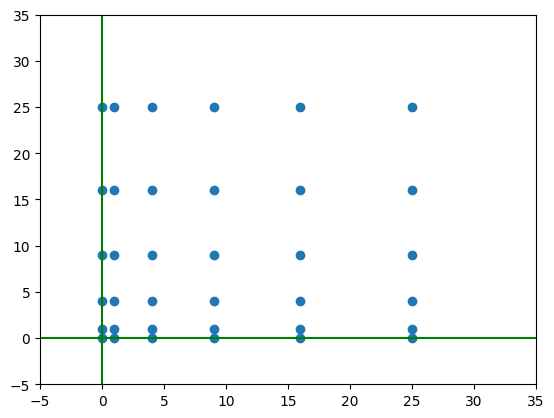

In [18]:

# %matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.set_loglevel('error')

vv = np.array(list(((x,y) for x in range(6) for y in range(6))))

fig, ax = plt.subplots()
plt.ylim(-5, 35)
plt.xlim(-5, 35)

vv **= 2

ax.scatter(vv[:,0], vv[:,1])
# ax.grid()
ax.axhline(color='g')
ax.axvline(color='g')

plt.show()
